[View in Colaboratory](https://colab.research.google.com/github/prk2104/prk210402/blob/master/MLck.ipynb)

# Machine Learning Shared Notebook



A sample submission file can be found [here](https://docs.google.com/spreadsheets/d/e/2PACX-1vSiFSAUXDrvp1TK8Yqft2T25UoZytZU6NMEbcd3Khfipyr3-dA2UJP0jjsbEKFXlvbkgoxNhiDHSnfC/pub?output=csv).

# Commentary 



* Posnodes looks like it has one outlier

*    looks like angioinv 1 is a good predictor but angioinv 2 and 3 aren't




In [0]:
# Load data

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#df = training data
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5I0hk5OBlmu28X8qRlFghCLSpex79dgAqkROldQw5ITLARyQuqLneOQXBeYKTjR6L4IsTvgNAO-6F/pub?output=csv", index_col="Patient")
#features 
features = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQWyMe_Zlpa--5GrU46YzpwCki6CaFgfgahGseNJdbtyzVAcszVeo51Fep9gg6CrucSGNP9z2qqlsD1/pub?output=csv")

## **EDA**

In [3]:
df.head()

,eventdeath,age,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,esr1
Patient,,,,,,,,,,,,,
s157,0,45,7.874059,0,0,0,1,30,1,1,1,1,0.352512
s340,1,43,3.121150,1,0,0,1,22,1,2,1,1,0.425800
s292,0,48,8.366872,0,0,0,7,10,0,1,1,1,0.054635
s355,0,50,6.045175,0,0,0,1,14,0,2,1,1,-0.052160
s161,1,46,8.128679,1,0,1,2,40,9,1,2,1,-0.147207


In [4]:
df.tail()

,eventdeath,age,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,esr1
Patient,,,,,,,,,,,,,
s344,0,44,6.874743,0,0,0,1,13,0,1,1,1,-1.247951
s199,0,39,10.907598,0,0,0,1,15,0,3,3,1,-0.597746
s247,0,50,5.637235,1,1,1,1,20,1,2,2,1,0.065051
s75,1,52,2.209446,0,1,1,1,28,0,3,1,1,-1.055801
s241,1,41,2.004107,1,0,0,1,25,0,3,1,2,-1.186065


In [5]:
df.describe()

,eventdeath,age,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,esr1
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,0.271889,43.834101,7.327901,0.373272,0.119816,0.414747,1.129032,22.161290,1.225806,2.105991,1.622120,1.244240,-0.256339
std,0.445962,5.575254,3.994658,0.484792,0.325497,0.493817,0.602414,8.578978,2.006858,0.795130,0.863385,0.577572,0.567546
min,0.000000,26.000000,0.271047,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,-1.511655
25%,0.000000,40.000000,4.892539,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,-0.597746
50%,0.000000,44.000000,6.995209,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,2.000000,1.000000,1.000000,-0.070873
75%,1.000000,48.000000,9.998631,1.000000,0.000000,1.000000,1.000000,28.000000,2.000000,3.000000,3.000000,1.000000,0.163550
max,1.000000,53.000000,18.080767,1.000000,1.000000,1.000000,7.000000,50.000000,13.000000,3.000000,3.000000,3.000000,0.596177


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, s157 to s241
Data columns (total 13 columns):
eventdeath        217 non-null int64
age               217 non-null int64
timerecurrence    217 non-null float64
chemo             217 non-null int64
hormonal          217 non-null int64
amputation        217 non-null int64
histtype          217 non-null int64
diam              217 non-null int64
posnodes          217 non-null int64
grade             217 non-null int64
angioinv          217 non-null int64
lymphinfil        217 non-null int64
esr1              217 non-null float64
dtypes: float64(2), int64(11)
memory usage: 23.7+ KB


In [7]:
df["posnodes"].value_counts()

0     114
1      47
2      18
3      15
4       8
5       4
7       3
6       3
9       2
8       2
13      1
Name: posnodes, dtype: int64

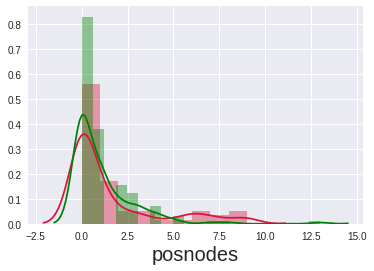

In [8]:
dead = df[df['eventdeath'] == 1]
alive = df[df['eventdeath'] == 0]

a1 = sns.distplot(dead['posnodes'], color='crimson')
a1 = sns.distplot(alive['posnodes'], color='g')
a1.plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('posnodes', fontsize = 20)
plt.show()

In [9]:
#Check amount of nulls in each column
df.isnull().sum()

eventdeath        0
age               0
timerecurrence    0
chemo             0
hormonal          0
amputation        0
histtype          0
diam              0
posnodes          0
grade             0
angioinv          0
lymphinfil        0
esr1              0
dtype: int64

In [0]:
#Create Subset of those who get cancer and those who do not
death = df.eventdeath == 1
nodeath = df.eventdeath == 0

#make sure subset includes all columns
death = df[death]
nodeath = df[nodeath]

In [11]:
#Compare stats between subsets
print(death.describe())
print(nodeath.describe())

       eventdeath        age  timerecurrence      chemo   hormonal  \
count        59.0  59.000000       59.000000  59.000000  59.000000   
mean          1.0  42.627119        3.552476   0.305085   0.067797   
std           0.0   6.255751        2.843025   0.464396   0.253555   
min           1.0  28.000000        0.271047   0.000000   0.000000   
25%           1.0  38.000000        1.247091   0.000000   0.000000   
50%           1.0  43.000000        2.696783   0.000000   0.000000   
75%           1.0  48.000000        4.829569   1.000000   0.000000   
max           1.0  53.000000       12.145106   1.000000   1.000000   

       amputation   histtype       diam   posnodes      grade   angioinv  \
count   59.000000  59.000000  59.000000  59.000000  59.000000  59.000000   
mean     0.440678   1.135593  24.915254   1.559322   2.542373   1.881356   
std      0.500730   0.571074   8.989051   2.554720   0.624832   0.966414   
min      0.000000   1.000000   2.000000   0.000000   1.000000   1

In [12]:
#difference in measures of central tendency between those who died and those who didn't
#this allows for a quick check to see if any variable looks like it might have less of an effect

print(death.mean(axis=0) - nodeath.mean(axis=0))
print(death.median(axis=0) - nodeath.median(axis=0))

eventdeath        1.000000
age              -1.657691
timerecurrence   -5.185236
chemo            -0.093649
hormonal         -0.071444
amputation        0.035615
histtype          0.009011
diam              3.782343
posnodes          0.458056
grade             0.599335
angioinv          0.356039
lymphinfil       -0.032826
esr1             -0.332081
dtype: float64
eventdeath        1.000000
age              -2.000000
timerecurrence   -5.466119
chemo             0.000000
hormonal          0.000000
amputation        0.000000
histtype          0.000000
diam              5.000000
posnodes          0.000000
grade             1.000000
angioinv          0.000000
lymphinfil        0.000000
esr1             -0.386193
dtype: float64


# **Data Viz**

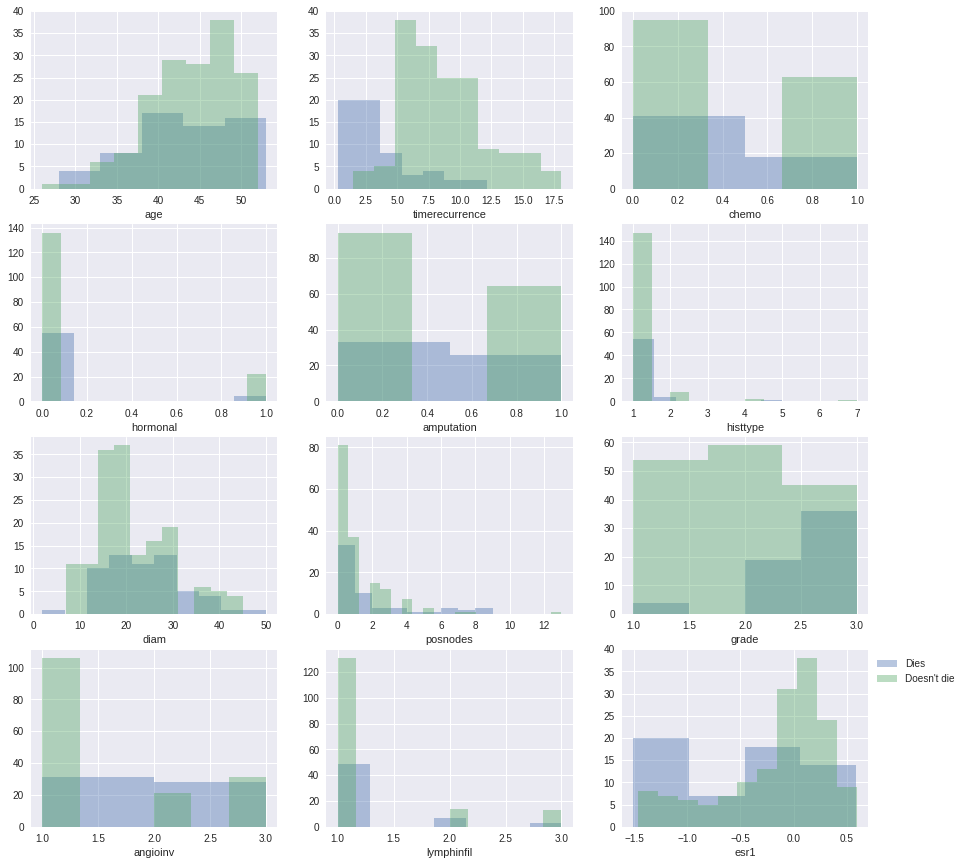

In [13]:
import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")
f, axes = plt.subplots(4, 3, figsize=(15, 15))

sns.distplot(death['age'], kde=False, label = "Dies",ax = axes[0,0])
sns.distplot(nodeath['age'], kde=False, label = "Doesn't die",ax = axes[0,0])


sns.distplot(death['timerecurrence'], kde=False, label = "Dies",ax = axes[0,1])
sns.distplot(nodeath['timerecurrence'], kde=False, label = "Doesn't die",ax = axes[0,1])

sns.distplot(death['chemo'], kde=False, label = "Dies",ax = axes[0,2])
sns.distplot(nodeath['chemo'], kde=False, label = "Doesn't die", ax = axes[0,2])

#Eventdeath, age , timerecurrence, chemo ,hormonal,amputation,histtype,
#diam ,posnodes ,grade ,angioinv ,lymphinfil, esr1

sns.distplot(death['hormonal'], kde=False, label = "Dies",ax = axes[1,0])
sns.distplot(nodeath['hormonal'], kde=False, label = "Doesn't die", ax = axes[1,0])


sns.distplot(death['amputation'], kde=False, label = "Dies",ax = axes[1,1])
sns.distplot(nodeath['amputation'], kde=False, label = "Doesn't die", ax = axes[1,1])

sns.distplot(death['histtype'], kde=False, label = "Dies",ax = axes[1,2])
sns.distplot(nodeath['histtype'], kde=False, label = "Doesn't die", ax = axes[1,2])

sns.distplot(death['diam'], kde=False, label = "Dies",ax = axes[2,0])
sns.distplot(nodeath['diam'], kde=False, label = "Doesn't die", ax = axes[2,0])

sns.distplot(death['posnodes'], kde=False, label = "Dies",ax = axes[2,1])
sns.distplot(nodeath['posnodes'], kde=False, label = "Doesn't die", ax = axes[2,1])

sns.distplot(death['grade'], kde=False, label = "Dies",ax = axes[2,2])
sns.distplot(nodeath['grade'], kde=False, label = "Doesn't die", ax = axes[2,2])

sns.distplot(death['angioinv'], kde=False, label = "Dies",ax = axes[3,0])
sns.distplot(nodeath['angioinv'], kde=False, label = "Doesn't die", ax = axes[3,0])

sns.distplot(death['lymphinfil'], kde=False, label = "Dies",ax = axes[3,1])
sns.distplot(nodeath['lymphinfil'], kde=False, label = "Doesn't die", ax = axes[3,1])

sns.distplot(death['esr1'], kde=False, label = "Dies",ax = axes[3,2])
sns.distplot(nodeath['esr1'], kde=False, label = "Doesn't die", ax = axes[3,2])
plt.legend()
plt.legend(bbox_to_anchor = [1, 1])

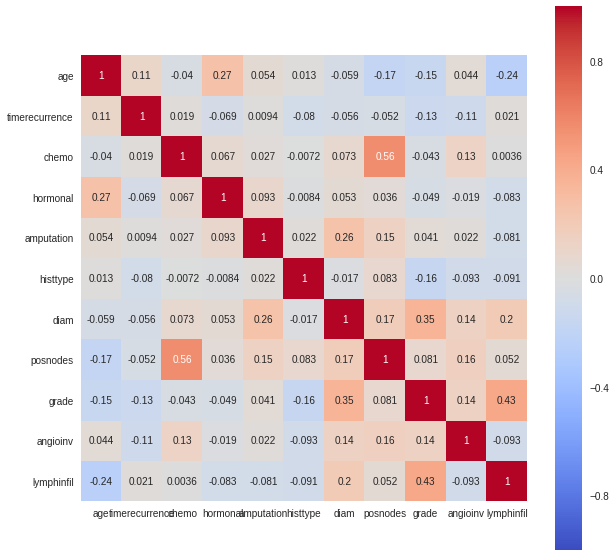

In [14]:
# heat map of the correlations between the features.
features_mean= list(df.columns[1:12])

plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

ValueError: ignored

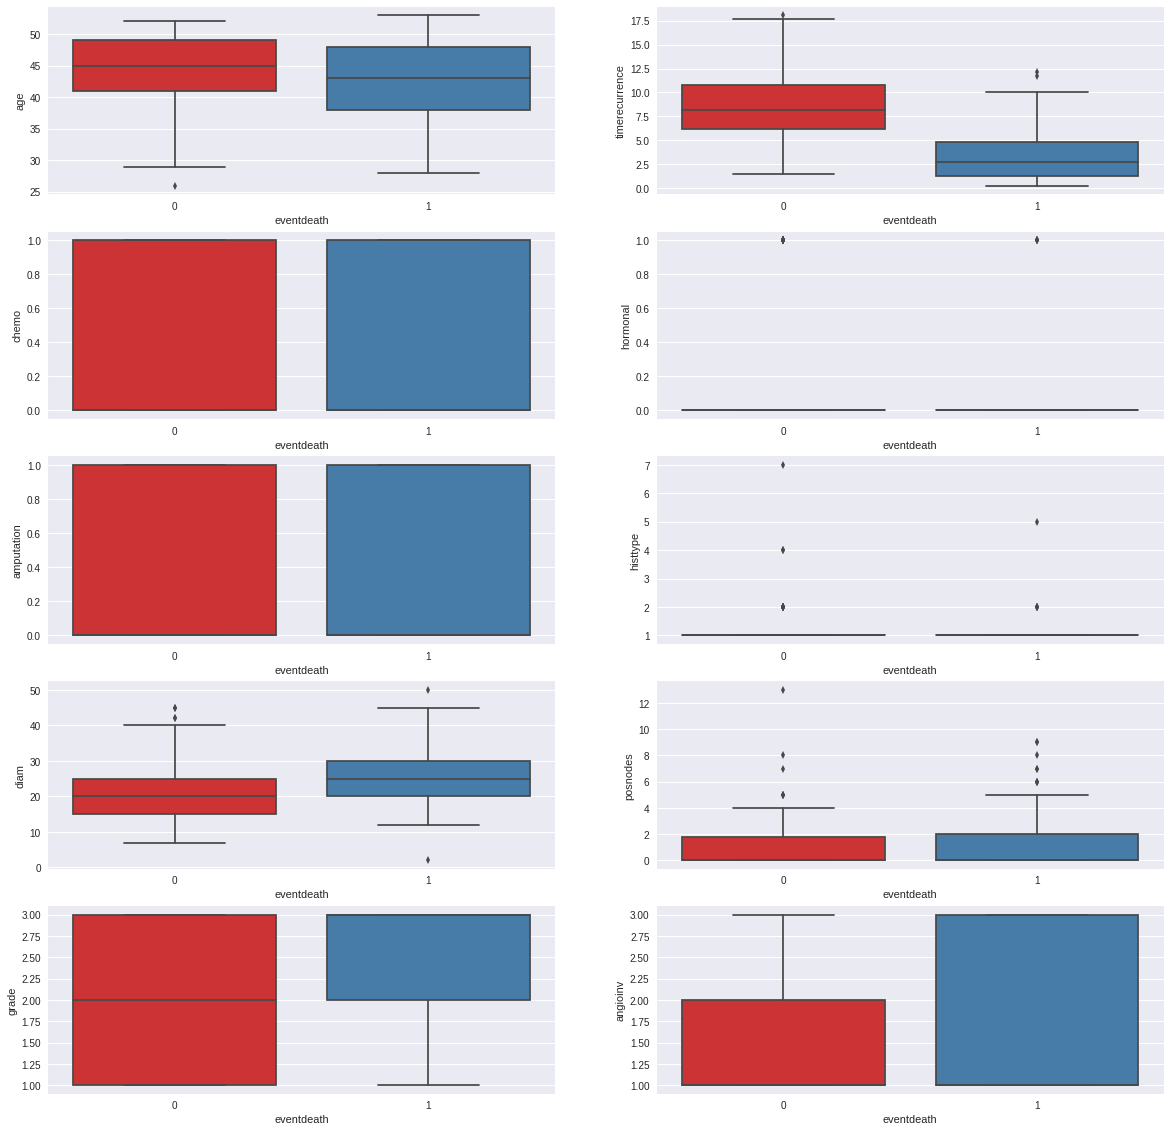

In [15]:
plt.figure(figsize=(20,20))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='eventdeath', y=feature, data=df, palette="Set1")


plt.show()

## **Machine Learning Testing**




Test Combinations tried: <p>
1) Everything but histtype (RandomForest 90) <p>


> df = df[["eventdeath", "age" , "timerecurrence", "chemo" ,"hormonal","amputation","diam" ,"posnodes" ,"grade" ,"angioinv" , "esr1", "lymphinfil"]].dropna()


2) Everything but histtype and limphinfil (rand forest & decision tree 93) <p>
> df = df[["eventdeath", "age" , "timerecurrence", "chemo" ,"hormonal","amputation","diam" ,"posnodes" ,"grade" ,"angioinv" , "esr1"]].dropna()




In [0]:
prediction_var = df[['timerecurrence','age' , 'diam' , 'posnodes','grade', 'eventdeath']]

In [18]:

# Split your data into testing and training data.

from sklearn.model_selection import train_test_split

train, test = train_test_split(prediction_var, test_size=0.2)

y_train = train['eventdeath']
x_train = train.drop('eventdeath', axis=1)

y_test = test['eventdeath']
x_test = test.drop('eventdeath', axis=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)



((173, 5), (173,))
((44, 5), (44,))


**Logistic Regression**

In [19]:
# Train a model.

# model training
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

# Make some predictions from your model.

y_pred = logreg.predict(x_test)
print (y_pred)

# Convert to Series.
# y_pred_series = pd.Series(y_pred)
# y_pred.to_csv('predictions.csv')




[1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0]


In [20]:
from sklearn.metrics import accuracy_score

logreg_score = accuracy_score(y_test, (y_pred))
print ('Testing Accuracy', logreg_score)

('Testing Accuracy', 0.9090909090909091)


**Decision Tree**

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(x_train, y_train)
print "\n\n\n"
print "### Decision Tree ###"
print "Training set score: ", tree.score(x_train, y_train)
print "Testing set score: ", tree.score(x_test, y_test)

print (y_pred)
len(y_pred)





### Decision Tree ###
Training set score:  0.9421965317919075
Testing set score:  0.8636363636363636
[1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0]


44

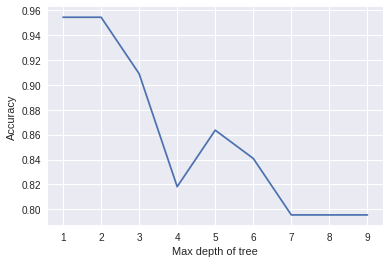

In [22]:
#Automated Decision Tree Depth Tester
model_accuracy = []

depths = range(1,10)
for depth in depths:
  tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
  tree.fit(x_train, y_train)
  model_accuracy.append(tree.score(x_test, y_test)
                       )
  
plt.plot(depths,model_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Max depth of tree")
plt.show()

In [25]:
### Random Forests (a Decision Tree Ensemble Method)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=11, random_state=0)
rf.fit(x_train, y_train)

print "\n\n\n"
print "### Random Forests ###"
print "Training set score: ", rf.score(x_train, y_train)
print "Testing set score: ", rf.score(x_test, y_test)


### K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

print "\n\n\n"
print "### K-Nearest Neighbor ###"
print "Training set score: ", knn.score(x_train, y_train)
print "Testing set score: ", knn.score(x_test, y_test)

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

print "\n\n\n"
print "### Support Vector Machine ###"
print "Training set score: ", svc.score(x_train, y_train)
print "Testing set score: ", svc.score(x_test, y_test)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=500)
mlp.fit(x_train, y_train)

print "\n\n\n"
print "### Multilayer perceptrons (Deep Learning)"
print "Training set score: ", mlp.score(x_train, y_train)
print "Testing set score: ", mlp.score(x_test, y_test)







### Random Forests ###
Training set score:  0.9942196531791907
Testing set score:  0.9090909090909091




### K-Nearest Neighbor ###
Training set score:  0.8439306358381503
Testing set score:  0.7727272727272727




### Support Vector Machine ###
Training set score:  0.953757225433526
Testing set score:  0.75




### Multilayer perceptrons (Deep Learning)
Training set score:  0.8728323699421965
Testing set score:  0.8863636363636364


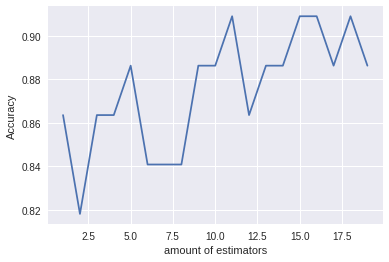

In [24]:
#Random Forest Optimizer
randforest_accuracy = []

randoms = range(1,20)
for random in randoms:
  rf = RandomForestClassifier(n_estimators=random, random_state=0)
  rf.fit(x_train, y_train)
  randforest_accuracy.append(rf.score(x_test, y_test)
                       )
plt.plot(randoms,randforest_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("amount of estimators")
plt.show()  

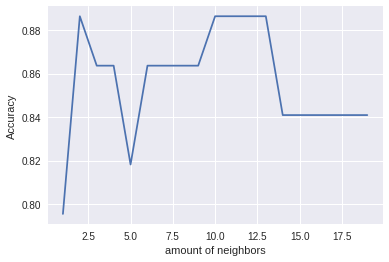

In [0]:
#K-Nearest Neighbor Optimizer

kneighbor_accuracy = []

neighbors = range(1,20)
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(x_train, y_train)
  kneighbor_accuracy.append(knn.score(x_test, y_test)
                       )
  
plt.plot(neighbors,kneighbor_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("amount of neighbors")
plt.show()

**Plot an ROC curve to assess true positive and false positive rates for model.**



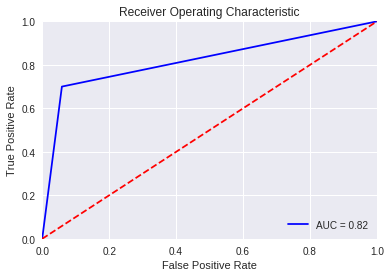

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_pred = logreg.predict(x_test)
y_test

from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()